In [1]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data = load_breast_cancer()

In [3]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
X = data.data
y = data.target

In [5]:
X.shape

(569, 30)

In [6]:
lrl1 = LR(penalty='l1', solver='liblinear', C=0.5, max_iter=1000)
lrl2 = LR(penalty='l2', solver='liblinear', C=0.5, max_iter=1000)

In [7]:
lrl1 = lrl1.fit(X, y)

In [8]:
# 逻辑回归的重要属性coef_，查看每个特征所对应的参数
lrl1.coef_

array([[ 4.00598976,  0.03201232, -0.13798829, -0.01622003,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.5046881 ,  0.        , -0.07125621,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.24591324, -0.1285515 , -0.01441103,  0.        ,
         0.        , -2.03453694,  0.        ,  0.        ,  0.        ]])

In [9]:
(lrl1.coef_ != 0).sum(axis=1)

array([10])

In [10]:
lrl2 = lrl2.fit(X, y)
lrl2.coef_

array([[ 1.61358623e+00,  1.00284781e-01,  4.61036191e-02,
        -4.21333984e-03, -9.27388895e-02, -3.00561176e-01,
        -4.53477303e-01, -2.19973055e-01, -1.33257382e-01,
        -1.92654788e-02,  1.87887747e-02,  8.75532438e-01,
         1.31708341e-01, -9.53440922e-02, -9.64408195e-03,
        -2.52457845e-02, -5.83085040e-02, -2.67948347e-02,
        -2.74103894e-02, -6.09326731e-05,  1.28405755e+00,
        -3.00219699e-01, -1.74217870e-01, -2.23449384e-02,
        -1.70489339e-01, -8.77400140e-01, -1.15869741e+00,
        -4.22909464e-01, -4.12968162e-01, -8.66604813e-02]])

In [11]:
(lrl2.coef_ != 0).sum(axis=1)

array([30])

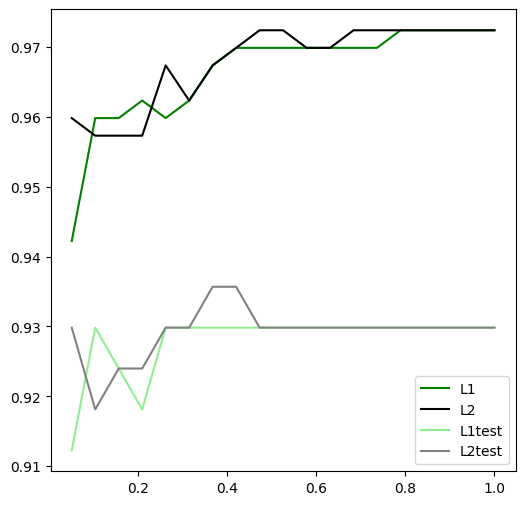

In [13]:
l1 = []
l2 = []
l1test = []
l2test = []

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

for i in np.linspace(0.05,2,19):
    lrl1 = LR(penalty="l1",solver="liblinear",C=i,max_iter=1000)
    lrl2 = LR(penalty="l2",solver="liblinear",C=i,max_iter=1000)

    lrl1 = lrl1.fit(Xtrain,Ytrain)
    l1.append(accuracy_score(lrl1.predict(Xtrain),Ytrain))
    l1test.append(accuracy_score(lrl1.predict(Xtest),Ytest))
    lrl2 = lrl2.fit(Xtrain,Ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain))
    l2test.append(accuracy_score(lrl2.predict(Xtest),Ytest))

graph = [l1,l2,l1test,l2test]
color = ["green","black","lightgreen","gray"]
label = ["L1","L2","L1test","L2test"]

plt.figure(figsize=(6,6))
for i in range(len(graph)):
    plt.plot(np.linspace(0.05,1,19),graph[i],color[i],label=label[i])
plt.legend(loc=4) #图例的位置在哪里?4表示，右下角
plt.show()